In [1]:
%%capture
import postproamrwind
from pylab import *
import numpy as np
%matplotlib inline

In [2]:
# Timining of runs
from functools import reduce

tAMR = "03:04:16"
AMRsec=reduce(lambda sum, d: sum * 60 + int(d), tAMR.split(":"), 0)

tNalu = "11:49:50"
Nalusec=reduce(lambda sum, d: sum * 60 + int(d), tNalu.split(":"), 0)

print("Speed-up = %f"%(double(Nalusec)/double(AMRsec)))

Speed-up = 3.852207


In [3]:
AMRdir='AMRRuns/AMRCompare6/'
GODdatfile=AMRdir+'/line_plot.txt'
t1=15000
t2=20000

In [4]:
# Load the AMR-wind data
#Nz    = 160
#Nvars = 23
tavg, headers=postproamrwind.avglineplot(GODdatfile, t1,t2)
zG, uG, vG, wG, uuG, vvG, wwG = postproamrwind.splitdat(tavg)

30000 15000.000000
40000 20000.000000
10001


In [5]:
# Load the Nalu Data
NaluDir = 'NaluRun/'
NaluU   = loadtxt(NaluDir+'/Vprof.dat')
NaluTKE = loadtxt(NaluDir+'/TKEprof.dat')

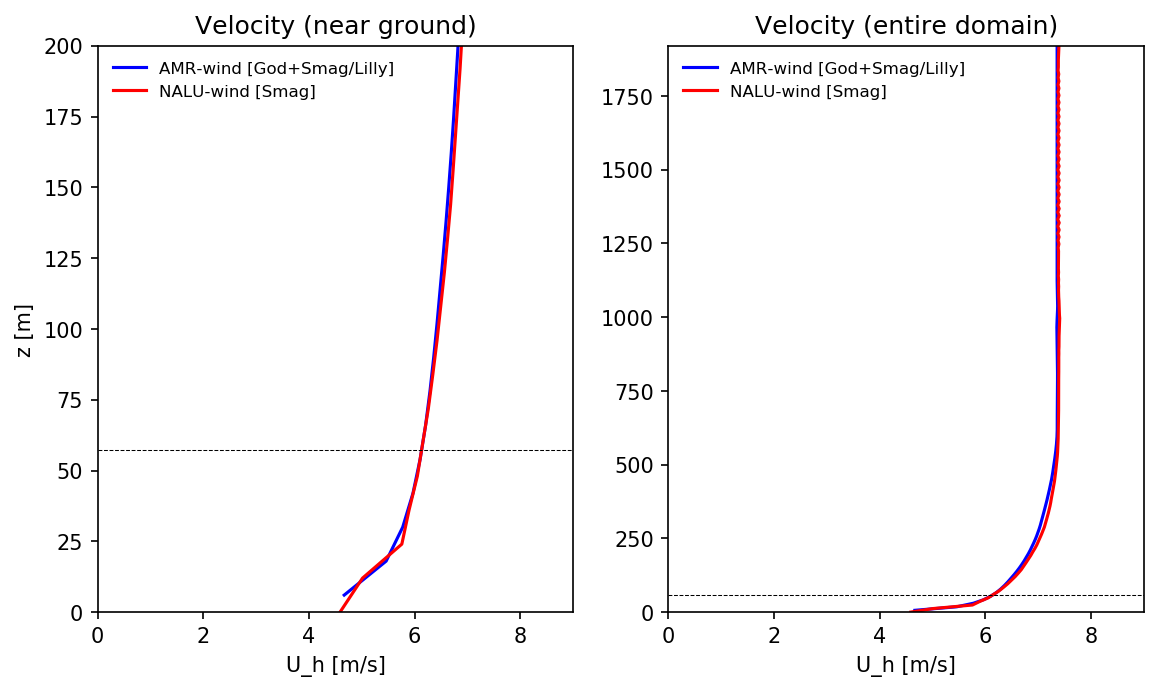

In [6]:
# Compare the velocity profiles
figure(figsize=(9,5),dpi=150)
UhorizG = np.sqrt(uG*uG + vG*vG)
UmagG   = np.sqrt(uG*uG + vG*vG + wG*wG)
#UhorizM=np.sqrt(uM*uM+vM*vM)

NaluUhoriz = np.sqrt(NaluU[:,1]**2 + NaluU[:,2]**2)
NaluZ     = NaluU[:,0]
yHH       = 57.19

# Make plot 1
subplot(121)
plot(UmagG, zG, 'b', label='AMR-wind [God+Smag/Lilly]')
#plot(UhorizM, zM, 'b--', label='AMR-wind [MOL]')
plot(NaluUhoriz, NaluZ, 'r', label='NALU-wind [Smag]')
ylim([0,200]);
xlim([0,9])
axhline(yHH, 0, 10, linestyle='--', color='k', linewidth=0.5)
xlabel('U_h [m/s]');
ylabel('z [m]');
title('Velocity (near ground)')
legend(loc='upper left',prop={'size': 8}, frameon=False)

# Make plot 2
subplot(122)
plot(UhorizG, zG, 'b', label='AMR-wind [God+Smag/Lilly]')
#plot(UhorizM, zM, 'b--', label='AMR-wind [MOL]')
plot(NaluUhoriz, NaluZ, 'r', label='NALU-wind [Smag]')
ylim([0,1920]);
xlim([0,9])
axhline(yHH, 0, 10, linestyle='--', color='k', linewidth=0.5)
xlabel('U_h [m/s]');
#ylabel('z [m]');
title('Velocity (entire domain)')
legend(loc='upper left',prop={'size': 8}, frameon=False)

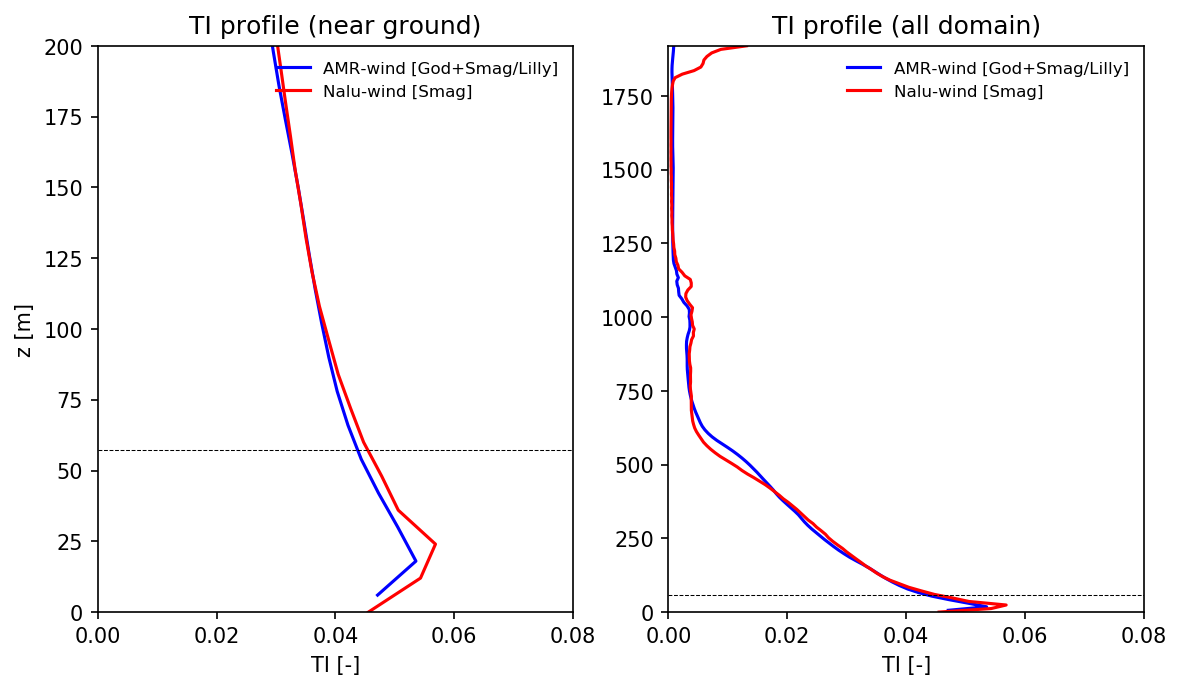

In [7]:
# Calculate TI
TKEG = 0.5*(uuG +vvG +wwG)
TIG  = sqrt(2.0/3.0*TKEG)/UhorizG
#TKEM = 0.5*(uuM+vvM+wwM)
#TIM  = sqrt(2.0/3.0*TKEM)/UhorizM

NTKE = 0.5*(NaluTKE[:,1] +  NaluTKE[:,2] +  NaluTKE[:,3])
NaluTI = sqrt(2.0/3.0*NTKE)/NaluUhoriz

# Compare the TI profiles
figure(figsize=(9,5),dpi=150)

# Make plot 1
subplot(121)
plot(TIG, zG, 'b-', label='AMR-wind [God+Smag/Lilly]')
#plot(TIM, zM, 'b--',label='AMR-wind [MOL]')
#plot(sqrt(2.0/3.0*NaluTKE[:,4])/NaluUhoriz, NaluTKE[:,0],'r', label='Nalu-wind' )
plot(NaluTI, NaluZ,'r', label='Nalu-wind [Smag]' )
ylim([0,200]);
xlim([0, 0.08])
axhline(yHH, 0, 1, linestyle='--', color='k', linewidth=0.5)
ylabel('z [m]')
xlabel('TI [-]')
title('TI profile (near ground)')
legend(loc='upper right',prop={'size': 8}, frameon=False)

# Make plot 2
subplot(122)
plot(TIG, zG, 'b-', label='AMR-wind [God+Smag/Lilly]')
#plot(TIM, zM, 'b--',label='AMR-wind [MOL]')
plot(sqrt(2.0/3.0*NaluTKE[:,4])/NaluUhoriz, NaluTKE[:,0],'r', label='Nalu-wind [Smag]' )
ylim([0,1920]);
xlim([0, 0.08])
axhline(yHH, 0, 1, linestyle='--', color='k', linewidth=0.5)
xlabel('TI [-]')
title('TI profile (all domain)')
legend(loc='upper right',prop={'size': 8}, frameon=False)

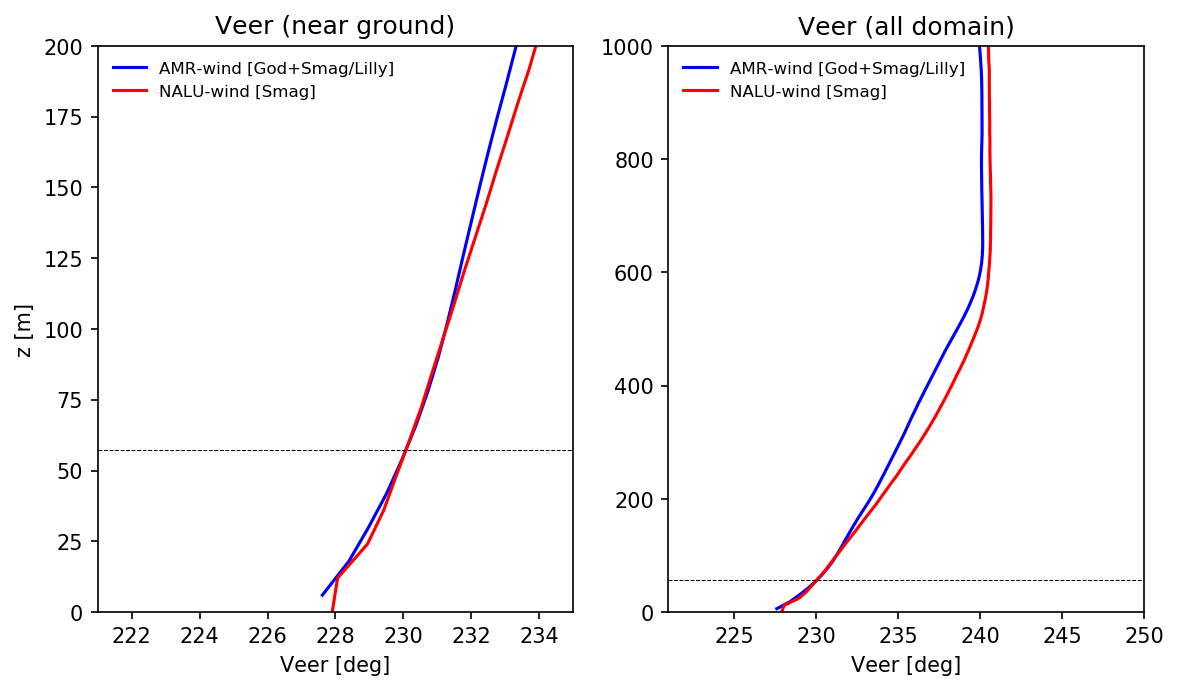

In [8]:
# Calculate veer
veerG = 270-np.arctan2(vG, uG)*180/math.pi
#veerM = 270-np.arctan2(vM, uM)*180/math.pi
veerN = 270-np.arctan2(NaluU[:,2], NaluU[:,1])*180/math.pi

# Compare the veer profiles
figure(figsize=(9,5),dpi=150)

# Make plot 1
subplot(121)
plot(veerG, zG, 'b', label='AMR-wind [God+Smag/Lilly]')
#plot(veerM, zM, 'b--', label='AMR-wind [MOL]')
plot(veerN, NaluU[:,0], 'r', label='NALU-wind [Smag]')
ylim([0,200]);
xlim([221,235])
axhline(yHH, 0, 360, linestyle='--', color='k', linewidth=0.5)
xlabel('Veer [deg]');
ylabel('z [m]');
title('Veer (near ground)')
legend(loc='upper left',prop={'size': 8}, frameon=False)

# Make plot 2
subplot(122)
plot(veerG, zG, 'b', label='AMR-wind [God+Smag/Lilly]')
#plot(veerM, zM, 'b--', label='AMR-wind [MOL]')
plot(veerN, NaluU[:,0], 'r', label='NALU-wind [Smag]')
ylim([0,1000]);
xlim([221,250])
axhline(yHH, 0, 360, linestyle='--', color='k', linewidth=0.5)
xlabel('Veer [deg]');
#ylabel('z [m]');
title('Veer (all domain)')
legend(loc='upper left',prop={'size': 8}, frameon=False)

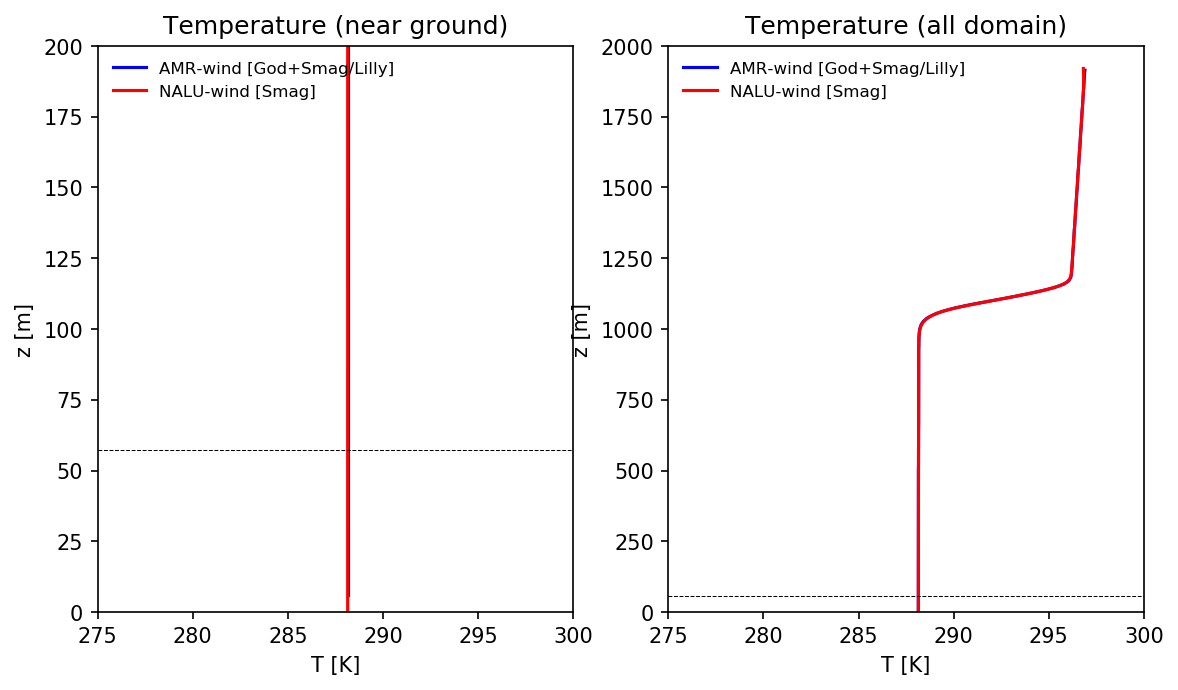

In [9]:
# Compare temperature
Tamr=tavg[:,6]
NaluT   = loadtxt(NaluDir+'/Tprof.dat')

figure(figsize=(9,5),dpi=150)
# Make plot 1
subplot(121)
plot(Tamr, zG, 'b', label='AMR-wind [God+Smag/Lilly]')
#plot(UhorizM, zM, 'b--', label='AMR-wind [MOL]')
plot(NaluT[:,1], NaluT[:,0], 'r', label='NALU-wind [Smag]')
ylim([0,200]);
xlim([275,300])
axhline(yHH, 0, 10, linestyle='--', color='k', linewidth=0.5)
xlabel('T [K]');
ylabel('z [m]');
title('Temperature (near ground)')
legend(loc='upper left',prop={'size': 8}, frameon=False)

subplot(122)
plot(Tamr, zG, 'b', label='AMR-wind [God+Smag/Lilly]')
#plot(UhorizM, zM, 'b--', label='AMR-wind [MOL]')
plot(NaluT[:,1], NaluT[:,0], 'r', label='NALU-wind [Smag]')
ylim([0,2000]);
xlim([275,300])
axhline(yHH, 0, 10, linestyle='--', color='k', linewidth=0.5)
xlabel('T [K]');
ylabel('z [m]');
title('Temperature (all domain)')
legend(loc='upper left',prop={'size': 8}, frameon=False)

#plot(Tamr, zG, 'b', label='AMR-wind [God+Smag/Lilly]')

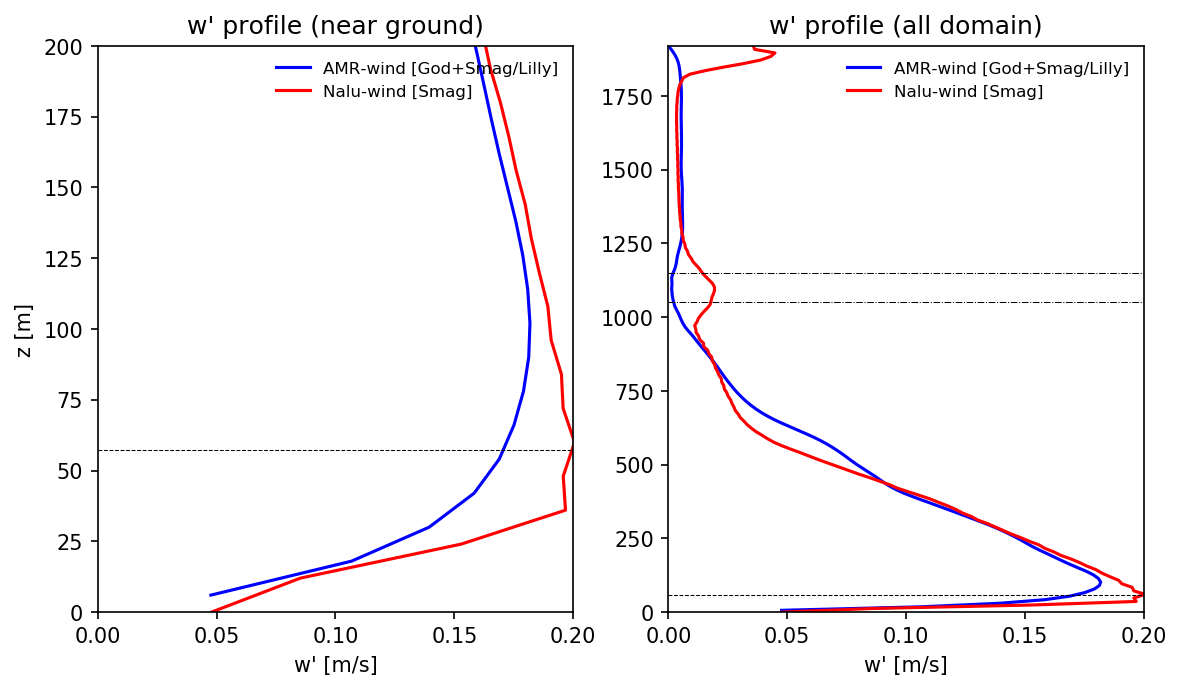

In [10]:
# Calculate w'
wpG = sqrt(wwG)
#TIG  = sqrt(2.0/3.0*TKEG)/UhorizG
#TKEM = 0.5*(uuM+vvM+wwM)
#TIM  = sqrt(2.0/3.0*TKEM)/UhorizM

#NTKE = 0.5*(NaluTKE[:,1] +  NaluTKE[:,2] +  NaluTKE[:,3])
#NaluTI = sqrt(2.0/3.0*NTKE)/NaluUhoriz
wpN = sqrt(NaluTKE[:,3])

# Compare the TI profiles
figure(figsize=(9,5),dpi=150)

# Make plot 1
subplot(121)
plot(wpG, zG, 'b-', label='AMR-wind [God+Smag/Lilly]')
#plot(TIM, zM, 'b--',label='AMR-wind [MOL]')
#plot(sqrt(2.0/3.0*NaluTKE[:,4])/NaluUhoriz, NaluTKE[:,0],'r', label='Nalu-wind' )
plot(wpN, NaluZ,'r', label='Nalu-wind [Smag]' )
ylim([0,200]);
xlim([0, 0.2])
axhline(yHH, 0, 1, linestyle='--', color='k', linewidth=0.5)
ylabel('z [m]')
xlabel('w\' [m/s]')
title('w\' profile (near ground)')
legend(loc='upper right',prop={'size': 8}, frameon=False)

# Make plot 2
subplot(122)
plot(wpG, zG, 'b-', label='AMR-wind [God+Smag/Lilly]')
#plot(TIM, zM, 'b--',label='AMR-wind [MOL]')
plot(wpN, NaluZ,'r', label='Nalu-wind [Smag]' )
#plot(sqrt(2.0/3.0*NaluTKE[:,4])/NaluUhoriz, NaluTKE[:,0],'r', label='Nalu-wind [Smag]' )
ylim([0,1920]);
xlim([0, 0.2])
axhline(yHH, 0, 1, linestyle='--', color='k', linewidth=0.5)
axhline(1050, 0, 1, linestyle='-.', color='k', linewidth=0.5)
axhline(1150, 0, 1, linestyle='-.', color='k', linewidth=0.5)
xlabel('w\' [m/s]')
title('w\' profile (all domain)')
legend(loc='upper right',prop={'size': 8}, frameon=False)

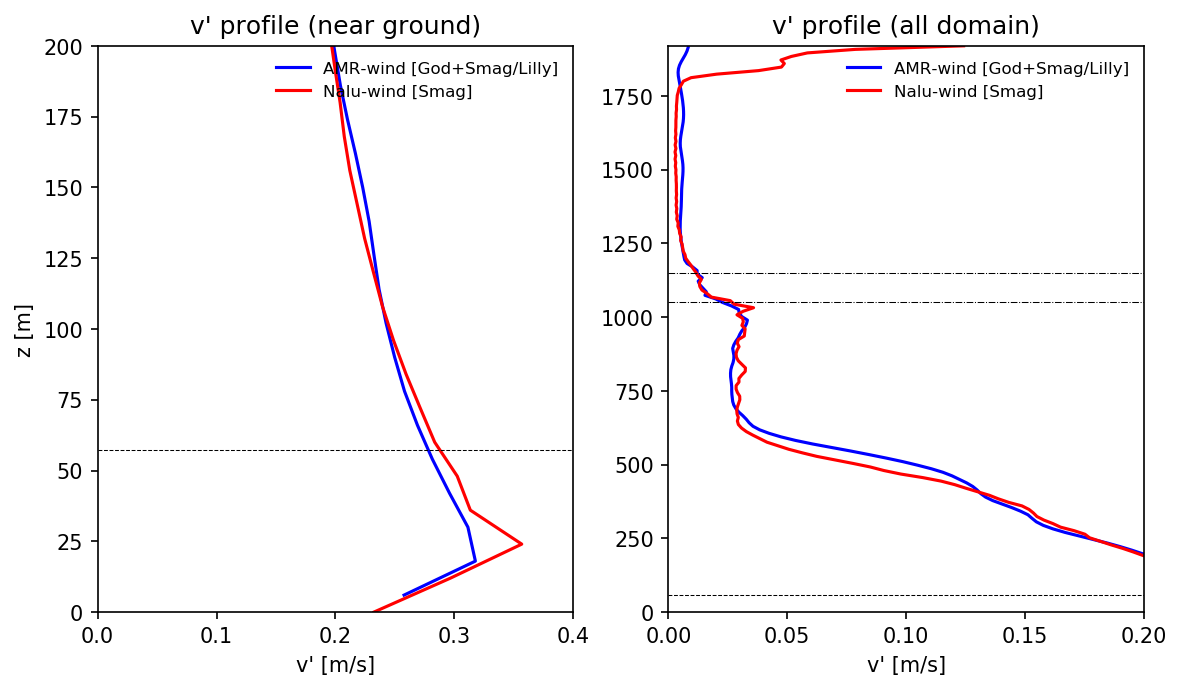

In [11]:
# Calculate w'
vpG = sqrt(vvG)
upG = sqrt(uuG)
#TIG  = sqrt(2.0/3.0*TKEG)/UhorizG
#TKEM = 0.5*(uuM+vvM+wwM)
#TIM  = sqrt(2.0/3.0*TKEM)/UhorizM

#NTKE = 0.5*(NaluTKE[:,1] +  NaluTKE[:,2] +  NaluTKE[:,3])
#NaluTI = sqrt(2.0/3.0*NTKE)/NaluUhoriz
vpN = sqrt(NaluTKE[:,2])
upN = sqrt(NaluTKE[:,1])

# Compare the TI profiles
figure(figsize=(9,5),dpi=150)

# Make plot 1
subplot(121)
plot(vpG, zG, 'b-', label='AMR-wind [God+Smag/Lilly]')
#plot(TIM, zM, 'b--',label='AMR-wind [MOL]')
#plot(sqrt(2.0/3.0*NaluTKE[:,4])/NaluUhoriz, NaluTKE[:,0],'r', label='Nalu-wind' )
plot(vpN, NaluZ,'r', label='Nalu-wind [Smag]' )
ylim([0,200]);
xlim([0, 0.4])
axhline(yHH, 0, 1, linestyle='--', color='k', linewidth=0.5)
ylabel('z [m]')
xlabel('v\' [m/s]')
title('v\' profile (near ground)')
legend(loc='upper right',prop={'size': 8}, frameon=False)

# Make plot 2
subplot(122)
plot(vpG, zG, 'b-', label='AMR-wind [God+Smag/Lilly]')
#plot(TIM, zM, 'b--',label='AMR-wind [MOL]')
plot(vpN, NaluZ,'r', label='Nalu-wind [Smag]' )
#plot(sqrt(2.0/3.0*NaluTKE[:,4])/NaluUhoriz, NaluTKE[:,0],'r', label='Nalu-wind [Smag]' )
ylim([0,1920]);
xlim([0, 0.2])
axhline(yHH, 0, 1, linestyle='--', color='k', linewidth=0.5)
axhline(1050, 0, 1, linestyle='-.', color='k', linewidth=0.5)
axhline(1150, 0, 1, linestyle='-.', color='k', linewidth=0.5)
xlabel('v\' [m/s]')
title('v\' profile (all domain)')
legend(loc='upper right',prop={'size': 8}, frameon=False)

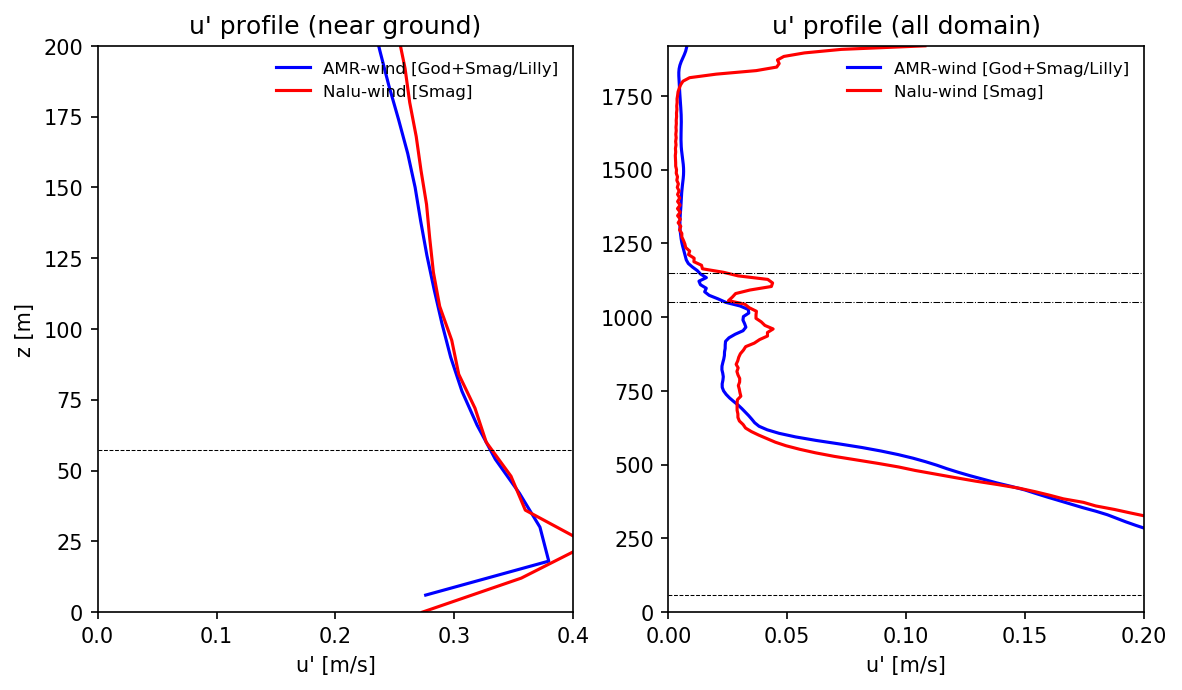

In [12]:
# Calculate w'
vpG = sqrt(vvG)
upG = sqrt(uuG)
#TIG  = sqrt(2.0/3.0*TKEG)/UhorizG
#TKEM = 0.5*(uuM+vvM+wwM)
#TIM  = sqrt(2.0/3.0*TKEM)/UhorizM

#NTKE = 0.5*(NaluTKE[:,1] +  NaluTKE[:,2] +  NaluTKE[:,3])
#NaluTI = sqrt(2.0/3.0*NTKE)/NaluUhoriz
vpN = sqrt(NaluTKE[:,2])
upN = sqrt(NaluTKE[:,1])

# Compare the TI profiles
figure(figsize=(9,5),dpi=150)

# Make plot 1
subplot(121)
plot(upG, zG, 'b-', label='AMR-wind [God+Smag/Lilly]')
#plot(TIM, zM, 'b--',label='AMR-wind [MOL]')
#plot(sqrt(2.0/3.0*NaluTKE[:,4])/NaluUhoriz, NaluTKE[:,0],'r', label='Nalu-wind' )
plot(upN, NaluZ,'r', label='Nalu-wind [Smag]' )
ylim([0,200]);
xlim([0, 0.4])
axhline(yHH, 0, 1, linestyle='--', color='k', linewidth=0.5)
ylabel('z [m]')
xlabel('u\' [m/s]')
title('u\' profile (near ground)')
legend(loc='upper right',prop={'size': 8}, frameon=False)

# Make plot 2
subplot(122)
plot(upG, zG, 'b-', label='AMR-wind [God+Smag/Lilly]')
#plot(TIM, zM, 'b--',label='AMR-wind [MOL]')
plot(upN, NaluZ,'r', label='Nalu-wind [Smag]' )
#plot(sqrt(2.0/3.0*NaluTKE[:,4])/NaluUhoriz, NaluTKE[:,0],'r', label='Nalu-wind [Smag]' )
ylim([0,1920]);
xlim([0, 0.2])
axhline(yHH, 0, 1, linestyle='--', color='k', linewidth=0.5)
axhline(1050, 0, 1, linestyle='-.', color='k', linewidth=0.5)
axhline(1150, 0, 1, linestyle='-.', color='k', linewidth=0.5)
xlabel('u\' [m/s]')
title('u\' profile (all domain)')
legend(loc='upper right',prop={'size': 8}, frameon=False)

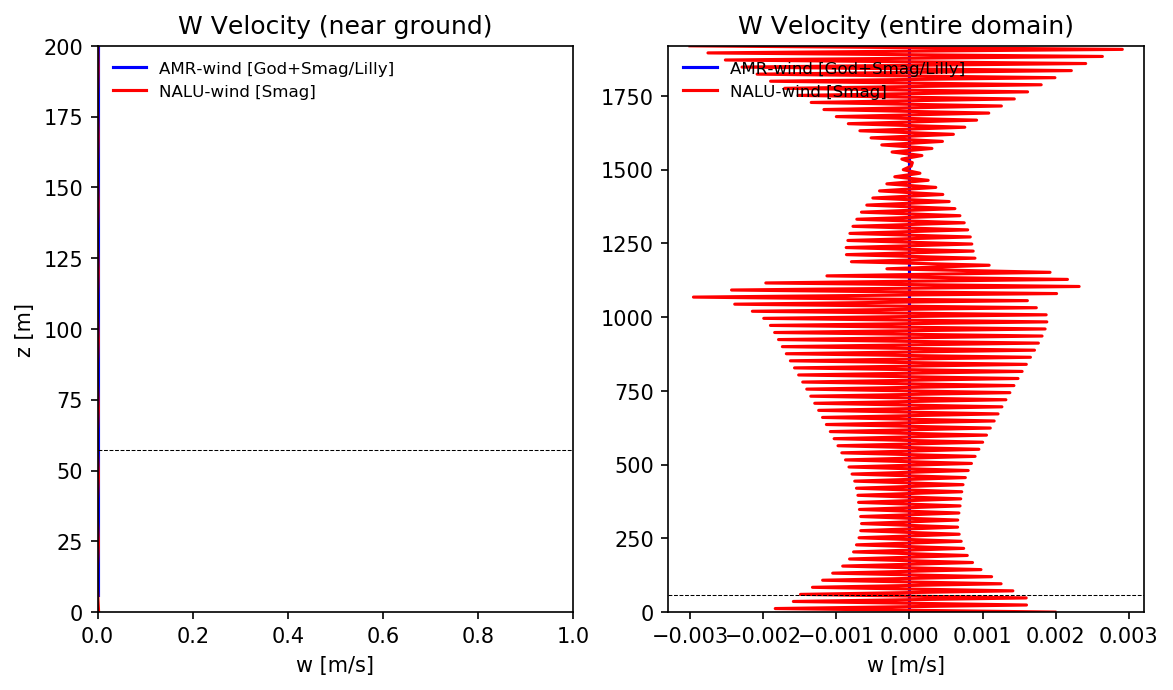

In [13]:
# Compare the velocity profiles
zG, uG, vG, wG, uuG, vvG, wwG = postproamrwind.splitdat(tavg)
figure(figsize=(9,5),dpi=150)
UhorizG = np.sqrt(uG*uG + vG*vG)
UmagG   = np.sqrt(uG*uG + vG*vG + wG*wG)
#UhorizM=np.sqrt(uM*uM+vM*vM)

NaluUhoriz = np.sqrt(NaluU[:,1]**2 + NaluU[:,2]**2)
NaluZ     = NaluU[:,0]
yHH       = 57.19

# Make plot 1
subplot(121)
plot(wG, zG, 'b', label='AMR-wind [God+Smag/Lilly]')
plot(NaluU[:,3], NaluZ, 'r', label='NALU-wind [Smag]')
ylim([0,200]);
xlim([0,1])
axhline(yHH, 0, 10, linestyle='--', color='k', linewidth=0.5)
xlabel('w [m/s]');
ylabel('z [m]');
title('W Velocity (near ground)')
legend(loc='upper left',prop={'size': 8}, frameon=False)

# Make plot 2
subplot(122)
plot(wG, zG, 'b', label='AMR-wind [God+Smag/Lilly]')
plot(NaluU[:,3], NaluZ, 'r', label='NALU-wind [Smag]')
ylim([0,1920]);
#xlim([0,1])
axhline(yHH, 0, 10, linestyle='--', color='k', linewidth=0.5)
xlabel('w [m/s]');
#ylabel('z [m]');
title('W Velocity (entire domain)')
legend(loc='upper left',prop={'size': 8}, frameon=False)

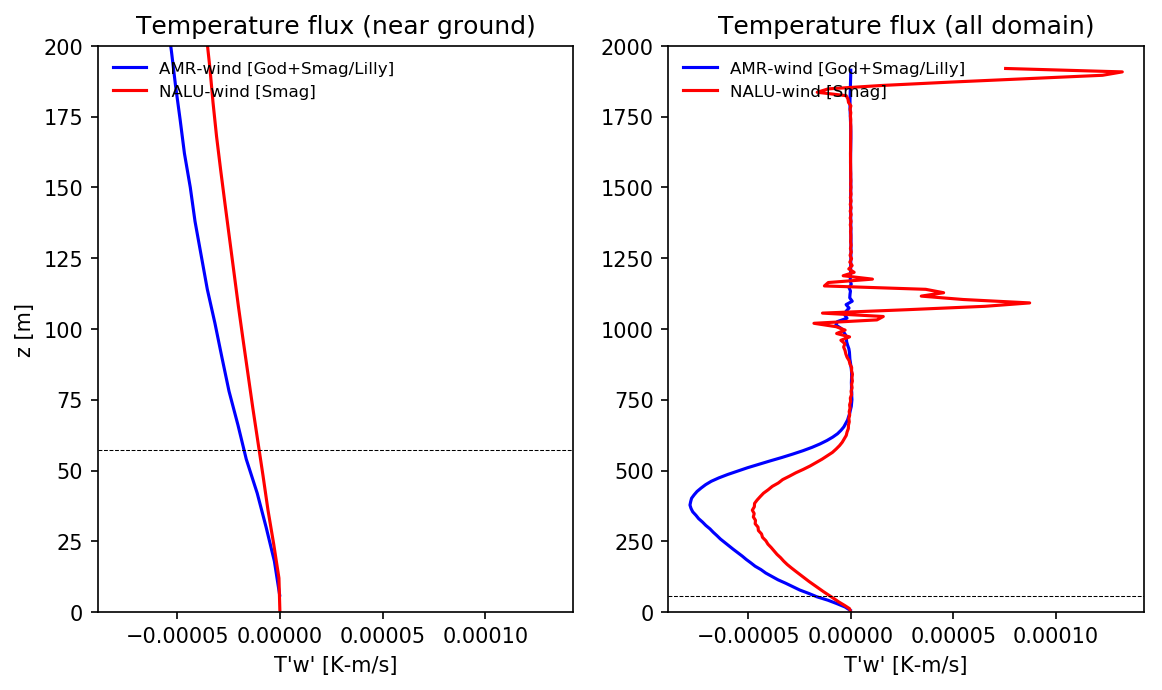

In [14]:
# Compare temperature fluxes
Tuamr=tavg[:,20]
Tvamr=tavg[:,21]
Twamr=tavg[:,22]
NaluTflux= loadtxt(NaluDir+'/Tfluxprof.dat')

figure(figsize=(9,5),dpi=150)
# Make plot 1
subplot(121)
plot(Twamr, zG, 'b', label='AMR-wind [God+Smag/Lilly]')
#plot(UhorizM, zM, 'b--', label='AMR-wind [MOL]')
plot(NaluTflux[:,3], NaluTflux[:,0], 'r', label='NALU-wind [Smag]')
ylim([0,200]);
#xlim([275,300])
axhline(yHH, 0, 10, linestyle='--', color='k', linewidth=0.5)
xlabel('T\'w\' [K-m/s]');
ylabel('z [m]');
title('Temperature flux (near ground)')
legend(loc='upper left',prop={'size': 8}, frameon=False)

subplot(122)
plot(Twamr, zG, 'b', label='AMR-wind [God+Smag/Lilly]')
#plot(UhorizM, zM, 'b--', label='AMR-wind [MOL]')
plot(NaluTflux[:,3], NaluTflux[:,0], 'r', label='NALU-wind [Smag]')
ylim([0,2000]);
#xlim([275,300])
axhline(yHH, 0, 10, linestyle='--', color='k', linewidth=0.5)
xlabel('T\'w\' [K-m/s]');
#ylabel('z [m]');
title('Temperature flux (all domain)')
legend(loc='upper left',prop={'size': 8}, frameon=False)

In [15]:
print(max(abs(Tuamr)), max(abs(Tvamr)), max(abs(Twamr)))

0.0002435877489999998 0.00019573792600000018 7.836181509999996e-05
